# 第三次课堂作业——空间滤波

**学号：**201983160037

**姓名：**强盛周

**班级：**19信计嵌入1班

**邮箱：**qshengz@foxmail.com

**课程名称：**数字图像处理II

**授课教师：**陈允杰教授

# 一、作业要求
- 查阅网络的空间滤波并实验
- 例如：Sobel算子，低通滤波器

# 二、理论介绍

## 1.空间滤波
空间滤波，就是直接在灰度值上，做一些滤波操作。滤波一词，其实来源于频域，将某个频率成分滤除的意思。大部分线性的空间滤波器（比如均值滤波器），是在空间上进行一些灰度值上的操作，这个线性空间滤波器与频域滤波器有一一对应的关系（比如均值滤波器其本质就是低通滤波器），这样会有助于理解这个滤波器的特性。然而，对于非线性的滤波器（比如最大值，最小值和中央值滤波器）的话，则没有这样一个一一对应的关系。

线性空间滤波所使用的运算是卷积，其计算如下所示。

![20140725145836343.jpg](https://s2.loli.net/2022/03/15/x57LJB2kgE3OGWs.jpg)

在执行空间滤波的时候，我们都会使用到这个操作。

这个式子可能会出现两个问题。这次是在空间域进行操作的，所以上式应该没什么问题。但是，如果换到频域，我们会发现，我们使用的滤波器是非因果的，按照我之前在数字信号处理的那一节，非因果具有零相位特性，但是是不可实现的，因为需要未来的输入。而在这，我们在图像处理的时候，都是一帧一帧的处理，所以，这里非因果性不是问题。而最重要的是，零相位特性不会使得图像变形，这是很重要的。

还有一个问题就是边界问题，当滤波器的中心靠近图像边缘时候，滤波器的一部分会位于图像外，那么此时，我们通常会采用填0的操作来解决。但是，一些场合，直接填0操作会使得操作后的图像出现黑边。所以，常用的操作还有，①选择距离最近的点填充，②填充的点为圆图像的镜像，③将原图像当做周期信号来填充。

## 2.几个典型的空间滤波器
### 2.1平滑滤波器
在空间域上考虑，我们所指的平滑滤波器，有平均滤波与加权平均滤波两种形式。
![20140725150616999.jpg](https://s2.loli.net/2022/03/15/j4N5CoLwqlYanD9.jpg)
这里很好理解，将滤波器范围内的点，求平均值（或者加权平均值）。这样会使得图像平滑，有助于去掉一些噪声。

我们将其放到频域去考虑的话，其实这是一个很典型的低通滤波器。这个滤波器会滤掉高频成分，所以可以使得图像平滑。其频率响应如下所示。

![20140725150610921.jpg](https://s2.loli.net/2022/03/15/hj9NQYqzk5l1FUv.jpg)
<center>3X3平均滤波的频率响应</center>

![20140725151017848.jpg](https://s2.loli.net/2022/03/15/UYuEBdFjJVZnm68.jpg)
<center>3X3加权平均滤波的频率响应</center>


首先，对于两个滤波器的振幅特性。平均滤波器的通带要比加权平均滤波器的窄，故使用平均滤波器处理的图像要比加权滤波器处理的图像要模糊一些。

注意平均滤波器的相位特性，其相位特性并不是一个平面，有的地方的值为π。首先，平均滤波器是一个偶实函数，其频率响应是一个实函数。但是，其频率响应有的部分为负值，这就造成了Matlab的angle()的计算结果为π。其实其还是具有0相位特性的。

用其处理实际处理图像的话，会得到以下结果。

![20140725151123343.jpg](https://s2.loli.net/2022/03/15/vsdOKHfX7eZ5Dxq.jpg)
看其处理结果，其实很难分辨出有什么区别。所以，加权平均滤波器和平均滤波器的区别，从频率响应来看的话，容易明白一些。本文只是简单的介绍一下均值滤波器，详细的，请参看[数字图像处理]图像去噪初步(1)--均值滤波器



### 2.2统计排序滤波器
统计排序滤波器的运用也广泛，其是很典型的非线性滤波器。主要包括了，最大值滤波器，最小值滤波器，中央值滤波器等等。这里作为代表的，主要说中央值滤波器，中央值滤波对于去除椒盐噪声特别有效。

所谓中央值滤波器，就是将滤波器范围内的像素的灰度值，进行排序，选出中央值作为这个像素的灰度值。同理可解释最大值滤波器与最小值滤波器。

我们将一幅图像添加椒盐噪声，然后尝试着用中央值滤波器去除。
![20140725151749095.jpg](https://s2.loli.net/2022/03/15/LJDTu6AiRcQwO1F.jpg)
![image.png](https://s2.loli.net/2022/03/15/mgl6pixZGXADRf8.png)



从直方图中，可以看出，中央值滤波器对于椒盐噪声，有很好的去噪作用。关于非线性滤波的详细，请参看[数字图像处理]图像去噪初步(2)--非线性滤波器



### 2.3锐化滤波器
使用平均滤波器，可以将图像平滑，其本质是将图像在滤波器范围内求平均值。从频域上来看，平均滤波器是低通滤波器。然而，所谓的锐化，即是将图像的细节强调出来。这里进行了一个假设，假设细节部分是图像高频成分。从这里看来，其实锐化滤波器是与平均滤波器是相反的操作。

对于一个一次元函数，其一阶微分为
![20140725154149944.jpg](https://s2.loli.net/2022/03/15/aC8NxKs1ZPyqQpu.jpg)


这样的微分被称为向前一次微分，这样的微分会产生一个采样点(针对图像来说，偏移一个像素)的偏移。为了避免这样的偏移，一般将向前一次微分与向后一次微分连用，这样就不会产生一些偏移，如下所示。
![20140725154309785.jpg](https://s2.loli.net/2022/03/15/Ll1sQ74HWYho26I.jpg)


现在将其二阶段微分扩展到二次元的图像，如下所示。
![20140725154943327.jpg](https://s2.loli.net/2022/03/15/1KkQdjG5sc8EpFR.jpg)


将其写成滤波器的形式的话，如下左所示。我们为了强调其微分效果，也可以在斜方向上加上一个微分效果，如下右所示。我们将其称为拉普拉斯算子。



其频率响应如下所示。
![20140725155200763.jpg](https://s2.loli.net/2022/03/15/hA4opg6MnBuHxlU.jpg)
<center>四方向的拉普拉斯滤波器的频率响应</center>


![20140725154939593.jpg](https://s2.loli.net/2022/03/15/SDZ3C7hUmfW5xbo.jpg)
<center>八方向的拉普拉斯滤波器的频率响应</center>


我们可以看出，八方向的拉普拉斯滤波器对于高频成分的强调效果较强。其低频部分最小值为0，这意味着，进行拉普拉斯滤波之后，其实只剩下图像的高频部分了（在空间域里来讲，只剩下边缘部分了）。所以，若用于图像锐化的话，可以将所得结果叠加至原图像，其实也就相当与滤波器的振幅特性往上移动1，保证低频部分不变，强调高频部分。
![20140725155807692.jpg](https://s2.loli.net/2022/03/15/mophwuq3BZA6ylt.jpg)



### 2.4高提升滤波
高提升滤波一般用于使得图片更加清晰。其步骤大致如下，首先将图片模糊化，然后从原图中，将其模糊形式去除。
![20140725160110399.jpg](https://s2.loli.net/2022/03/15/AqINEO4zhrpV65i.jpg)

从而得到图像的反锐化掩蔽，然后用将其叠加至原图上，从而使得图像更清晰。
![20140725160117794.jpg](https://s2.loli.net/2022/03/15/dGt9wYJZrzh3f2U.jpg)

当k=1的时候，这个操作称为反锐化掩蔽。当k>1时候，这个操作称为高提升滤波。
其实，高提升滤波也是一种锐化滤波，其强调的也是图像的边缘部分（或者跳变部分）。用以下实验可以加深对高提升滤波的理解。

![20140725160151724.jpg](https://s2.loli.net/2022/03/15/bs5aqoSBLMtK2TH.jpg)
得到的结果确实比原图更加的清晰了。为了更深一步理解，我们将第77行的灰度曲线画出来，看看具体啥样的。
首先是原图的77行与高斯模糊后的77行。
![20140725160031437.jpg](https://s2.loli.net/2022/03/15/snVA1EvFKTmUPwN.jpg)

然后是原图与模糊后的图像的差，其图像如下所示。
![20140725160041343.jpg](https://s2.loli.net/2022/03/15/xF3W6DCOk9LtiGz.jpg)

可以看出，边缘部分都凸显出来了，下面，我们将这个部分乘以某个常数，再叠加回原图，就可以得到高提升滤波的结果，如下所示。
![20140725160323701.jpg](https://s2.loli.net/2022/03/15/6wRoJjcmPMKaeAv.jpg)

可以看出，字体的边缘部分被强调了。这样会使得字体在感觉上，更加的清晰。
![20140725160451015.jpg](https://s2.loli.net/2022/03/15/vKjo1WS98iTYsgP.jpg)

### 2.5 sobel滤波器
sobel滤波器也是一个常用的滤波器。其原理与锐化滤波器也很像，其运用了一阶微分，使得边缘部分得到保留，滤除了其余的平滑部分。
现在来分析一下sobel滤波器。纵向看这个滤波器，是一个中心2次式微分运算，这个运算是一个高通滤波器。由此可以确定，sobel滤波器是可以提取图像的边缘。再看纵向，纵向其实是一个加权平均滤波器，这也就说明了，其实sobel滤波器有一定的平滑作用。综上，sobel滤波器是由以下两个滤波器合成的。
![20140725162332173.jpg](https://s2.loli.net/2022/03/15/H3kqFrt7EY9ilBs.jpg)

Sobel滤波器有两个方向，所以，其两个方向的频响如下所示。
![20140725162700714.jpg](https://s2.loli.net/2022/03/15/zsepFnBHt6ilghZ.jpg)
![20140725162708842.jpg](https://s2.loli.net/2022/03/15/m4rpiz1stuNATJS.jpg)

sobel滤波器可以抽出图像的边缘部分。从频域上来看，其保留了图像的中部频段部分。

# 三、实验以及结果

## 1. 导入库

In [1]:
# @Author: Alephant——QSZ
import numpy as np
import matplotlib.pylab as plt
import cv2
import random

## 2. 使用三个比较特殊的滤波器
OpenCV使用filter2D方法对图像进行滤波，为了演示滤波，这里使用三个比较特殊的滤波器核进行实验

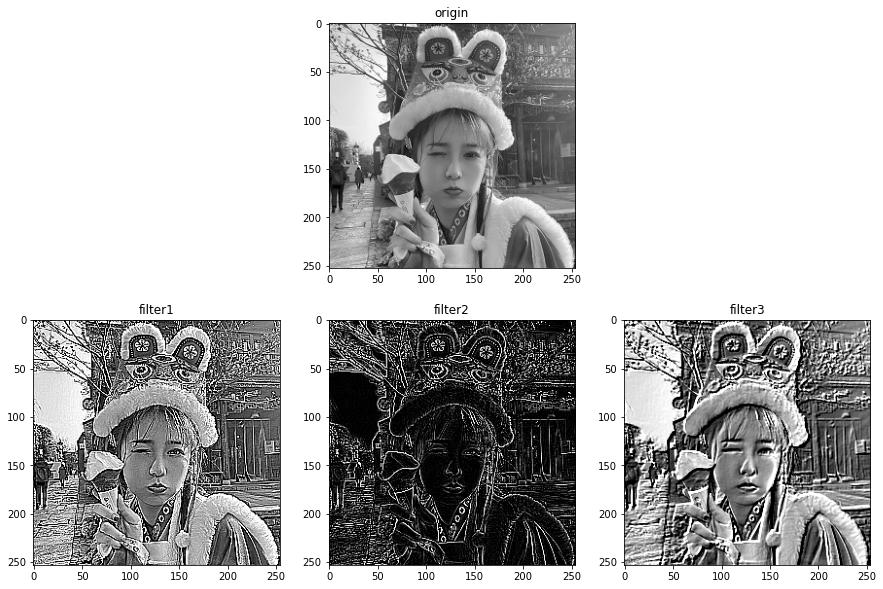

In [2]:
# use filter2D
# OpenCV使用filter2D方法对图像进行滤波，为了演示滤波，这里使用三个比较特殊的滤波器核进行实验。
image = cv2.imread(r"../images/zyw_254_square.png", cv2.IMREAD_GRAYSCALE)
 
kernel1 = np.array([
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1],
])
image1 = cv2.filter2D(image, -1, kernel1)
 
kernel2 = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1],
])
image2 = cv2.filter2D(image, -1, kernel2)
 
kernel3 = np.array([
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2],
])
image3 = cv2.filter2D(image, -1, kernel3)
 
plt.subplots(figsize=(15, 10))
plt.subplot(232), plt.imshow(image, 'gray'), plt.title('origin')
plt.subplot(234), plt.imshow(image1, 'gray'), plt.title('filter1')
plt.subplot(235), plt.imshow(image2, 'gray'), plt.title('filter2')
plt.subplot(236), plt.imshow(image3, 'gray'), plt.title('filter3')
plt.show()

三个滤波器分别如kernel1-3所示，第一个核是锐化核，图像锐化会增强图像的边缘及灰度跳变的部分，第二个核是一个边缘检测核，可以检测图像的边缘，最后一个核会让图像显示出浮雕的效果。

filter2D必须至少传入三个参数，分别代表原图像，结果图像的深度（一个像素数据所占的位数，传递-1表示和原图像采用一样的深度）以及滤波器核。


## 3. 定义噪声函数

In [3]:
# 添加椒盐噪声
def sp_noise(noise_img, proportion):
    '''
    添加椒盐噪声
    proportion的值表示加入噪声的量，可根据需要自行调整
    return: img_noise
    '''
    height, width = noise_img.shape[0], noise_img.shape[1]#获取高度宽度像素值
    num = int(height * width * proportion) #一个准备加入多少噪声小点
    for i in range(num):
        w = random.randint(0, width - 1)
        h = random.randint(0, height - 1)
        if random.randint(0, 1) == 0:
            noise_img[h, w] = 0
        else:
            noise_img[h, w] = 255
    return noise_img

# 添加高斯噪声
def gaussian_noise(img, mean, sigma):
    '''
    此函数用将产生的高斯噪声加到图片上
    传入:
        img   :  原图
        mean  :  均值
        sigma :  标准差
    返回:
        gaussian_out : 噪声处理后的图片
    '''
    # 将图片灰度标准化
    img = img / 255
    # 产生高斯 noise
    noise = np.random.normal(mean, sigma, img.shape)
    # 将噪声和图片叠加
    gaussian_out = img + noise
    # 将超过 1 的置 1，低于 0 的置 0
    gaussian_out = np.clip(gaussian_out, 0, 1)
    # 将图片灰度范围的恢复为 0-255
    gaussian_out = np.uint8(gaussian_out*255)
    # 将噪声范围搞为 0-255
    # noise = np.uint8(noise*255)
    return gaussian_out# 这里也会返回噪声，注意返回值

# 添加随机噪声
def sp_noise(noise_img, proportion):
    '''
    添加椒盐噪声
    proportion的值表示加入噪声的量，可根据需要自行调整
    return: img_noise
    '''
    height, width = noise_img.shape[0], noise_img.shape[1]#获取高度宽度像素值
    num = int(height * width * proportion) #一个准备加入多少噪声小点
    for i in range(num):
        w = random.randint(0, width - 1)
        h = random.randint(0, height - 1)
        if random.randint(0, 1) == 0:
            noise_img[h, w] = 0
        else:
            noise_img[h, w] = 255
    return noise_img


## 4. 几个常用滤波器
图像处理领域有一些常用的滤波方式（图像模糊），直接提供了相应的接口。看下面的例子，待处理的图像是zyw图像带有椒盐噪声的图片。

分别使用了均值滤波(blur)，高斯滤波(GaussianBlur)，中值滤波(medianBlur)以及双边滤波(bilateralFilter)。运行效果如图所示：

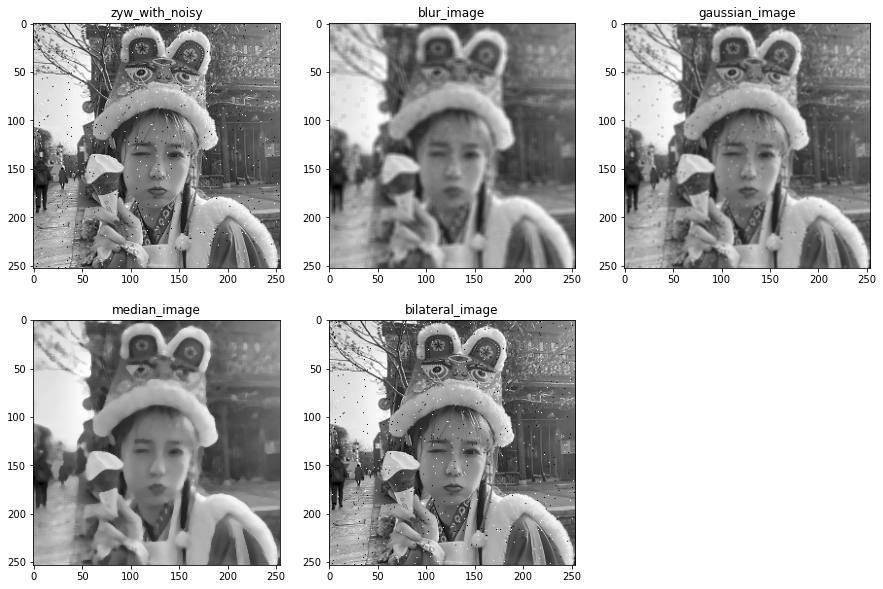

In [4]:
# use blur interface
image = cv2.imread(r"../images/zyw_254_square.png", cv2.IMREAD_GRAYSCALE)
noise_img = sp_noise(image, proportion=0.01)
# noise_img = gaussian_noise(image, mean=0, sigma=20)
# noise_img = sp_noise(image, proportion=0.03)
image = noise_img


blur_image = cv2.blur(image, (5, 5))
gaussian_image = cv2.GaussianBlur(image, (5, 5), 0.8)
median_image = cv2.medianBlur(image, 5)
bilateral_image = cv2.bilateralFilter(image, 5, 5, 5)
 
plt.subplots(figsize=(15, 10))
plt.subplot(231), plt.imshow(image, 'gray'), plt.title('zyw_with_noisy')
plt.subplot(232), plt.imshow(blur_image, 'gray'), plt.title('blur_image')
plt.subplot(233), plt.imshow(gaussian_image, 'gray'), plt.title('gaussian_image')
plt.subplot(234), plt.imshow(median_image, 'gray'), plt.title('median_image')
plt.subplot(235), plt.imshow(bilateral_image, 'gray'), plt.title('bilateral_image')
plt.show()

可以看到，对于去除椒盐噪声，使用均值滤波和中值滤波可以得到比较好的结果，但是高斯滤波和双边滤波则不是很好。


上面接口的参数可以查看OpenCV的接口文档，必须有的参数一般包括原图像和核的尺寸，对于高斯滤波和双边滤波需要添加相应的sigma参数，即标准差，它会直接影响到低通滤波的带宽。

# 四、参考资料

[1]zhoufan900428, “[数字图像处理]空间滤波.” https://blog.csdn.net/zhoufan900428/article/details/12884981 (accessed Mar. 15, 2022).

[2]有理叔, “OpenCV空间滤波.” https://blog.csdn.net/yjp19871013/article/details/78066745 (accessed Mar. 15, 2022).

[3]zlj0133, “Python+OpenCV批量给图片加噪声.” https://blog.csdn.net/qq_29568427/article/details/109709063 (accessed Mar. 15, 2022).

[4]“Spatial filter,” Wikipedia. May 07, 2021. Accessed: Mar. 15, 2022. [Online]. Available: https://en.wikipedia.org/w/index.php?title=Spatial_filter&oldid=1021932138

